# Graham Scan
Graham's scan is a method of finding the convex hull of a finite set of points in the plane with time complexity $O(n \log n)$. It is named after Ronald Graham, who published the original algorithm in 1972. The algorithm finds all vertices of the convex hull ordered along its boundary.

In [21]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return '(%.2f, %.2f)' % (self.x, self.y)
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.__dict__ == other.__dict__
        else:
            return False

In [5]:
# Three points are a counter-clockwise turn if ccw > 0, clockwise if
# ccw < 0, and collinear if ccw = 0 because ccw is a determinant that
# gives twice the signed  area of the triangle formed by p1, p2 and p3.
def ccw(p1, p2, p3):
    return (p2.x - p1.x)*(p3.y - p1.y) - (p2.y - p1.y)*(p3.x - p1.x)

In [34]:
import math
def graham(points):
    N = len(points)
    if N <= 2:
        return points
    
    # find point with lowest y coordinate
    temp = points[0]
    base = min(points, key=lambda p: p.y)
    points[0] = base
    if points.index(base) > 0:
        points[points[1:].index(base)] = temp
    
    def polar_angle(p):
        if base.x == p.x:
            return 0
        angle = math.asin((p.y-base.y) / math.sqrt((p.x-base.x)**2. + (p.y-base.y)**2.))
        return angle if base.x < p.x else math.pi-angle
            
    
    points.sort(key=polar_angle)

    # We want points[0] to be a sentinel point that will stop the loop.
    points.insert(0, points[-1])

    # M will denote the number of points on the convex hull.
    M = 1
    for i in range(2, N+1):
        # Find next valid point on convex hull.
        while ccw(points[M-1], points[M], points[i]) <= 0:
            if M > 1:
                M -= 1
            # All points are collinear
            elif i == N:
                break
            else:
                i += 1

        # Update M and swap points[i] to the correct place.
        M += 1
        temp = points[M]
        points[M] = points[i]
        points[i] = temp
    
    return (points[:M], M)

[(-4.00, 4.00), (0.00, 0.00), (3.00, 1.00), (4.00, 7.00), (2.00, 10.00), (-2.00, 8.00)]


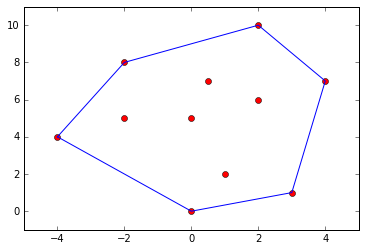

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
points = [
    Point(0, 0),
    Point(1, 2),
    Point(.5, 7),
    Point(2, 6),
    Point(3, 1),
    Point(4, 7),
    Point(2, 10),
    Point(0, 5),
    Point(-2, 8),
    Point(-2, 5),
    Point(-4, 4)
]
ps = list(map(lambda p: (p.x, p.y), points))
plt.plot(*zip(*ps), 'ro')
plt.axis([-5, 5, -1, 11])
hull, M = graham(points)
ps = list(map(lambda p: (p.x, p.y), hull + [hull[0]]))
plt.plot(*zip(*ps), 'b-')
print(hull)
plt.show()